# Team Ernst Engel Food Demand Notebook
In this notebook, we examine a system of demands for various food products, and examine heterogeneity in household consumption.

In [143]:
import pandas as pd
import numpy as np
from cfe import Regression
import warnings

In [145]:
%run nutritional_adequacy.ipynb

In [214]:
country = 'uganda'
year_range = '2013-14'
food_nutrients, food_prices, hh_chars, expenditures, hhc_sub, fp_sub, food_cols, fp_sub_avgs = get_data(country, year_range)

In [216]:
warnings.filterwarnings("ignore")
x = expenditures
x.columns.name = 'j'
x = x.T.groupby('j').sum().T
x = x.replace(0,np.nan)

y = np.log(x.set_index(['i','t','m']))

p = food_prices
p.columns.name = 'j'

d = hhc_sub.copy()
# d.reset_index(inplace = True)
d.columns.name = 'k'
d.set_index(['i','t','m'],inplace=True)

In [217]:
y = y.stack()

d = d.stack()

assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

result = Regression(y = y,d = d)

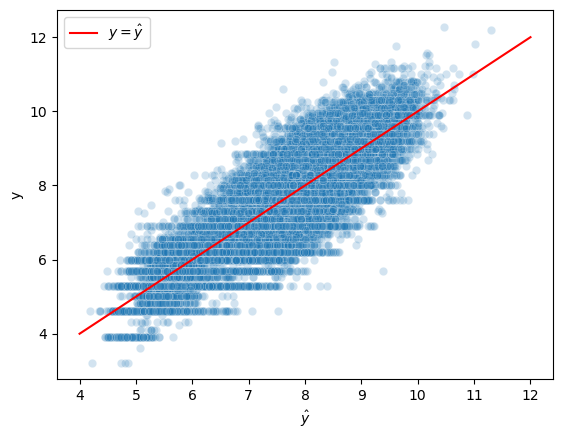

In [206]:
%matplotlib inline
plot_df = pd.DataFrame({'y' : y,'yhat' : result.get_predicted_log_expenditures()})

sns.scatterplot(data = plot_df, x = 'yhat', y = 'y', alpha = 0.2)
# plot_df.plot.scatter(x = 'yhat',y = 'y');

dummy_x = np.linspace(4, 12, 77)

# Overlay y = x line
plt.plot(dummy_x, dummy_x, color='red', label = r'$y = \hat{y}$')

plt.xlabel(r'$\hat{y}$')
plt.legend()

# Show plot
plt.show()